In [ ]:
# mount drive
from google.colab import drive
drive.mount("/drive") 

Mounted at /drive


In [ ]:
# imports
import numpy as np
import pandas as pd

In [ ]:
# imports for plots
from plotly import graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.io as pio

pio.templates.default = "plotly_white"

In [ ]:
# load data
selected_cols = ["cumulative_GDD", "cumulative_PREC", "cumulative_WS2M", "cumulative_RH2M"]
dict_data = {}

for col in selected_cols:
  pathname = f"/drive/My Drive/Colab Notebooks/AgriEdge/data_univariate_clustering/{col}.csv"

  dict_data[col] = pd.read_csv(pathname, index_col=0)

In [ ]:
# normalize data 
# devide by the max
for col in selected_cols:
  max_val = np.max(dict_data[col].values)

  dict_data[col] = dict_data[col] / max_val

In [ ]:
# check that every thing make sense
index_year = 30

fig = go.Figure(data=[
                      go.Scatter(
                          x=dict_data[col].columns,
                          y=dict_data[col].values[index_year],
                          name=col
                      )
                      for col in selected_cols
])

fig.update_layout(
    title="normalized weather paramters",
    height=400,
    width=600
)

fig.show()

In [ ]:
# general params of clustering

metric = "euclidean"
linkage_method = "ward"

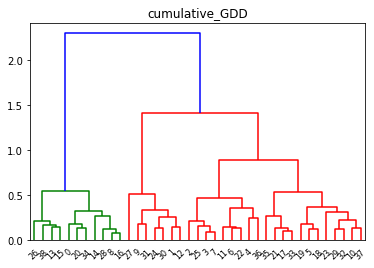

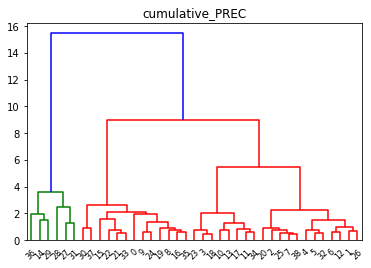

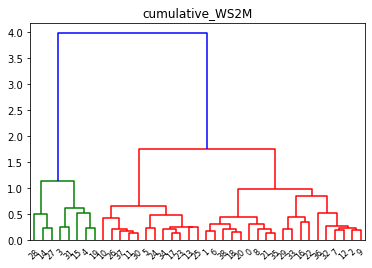

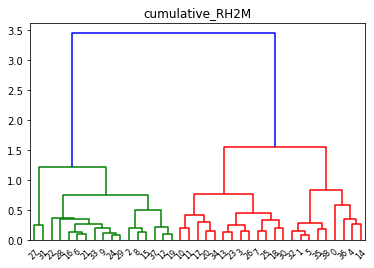

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

for col in selected_cols:
  Z = linkage(dict_data[col], metric=metric, method=linkage_method)
  # fig = plt.figure(figsize=(25, 10))
  dn = dendrogram(Z)
  plt.title(col)
  plt.show()

In [ ]:
# plot dendrogram

for col in selected_cols:
  fig = ff.create_dendrogram(dict_data[col])


  fig.update_layout(
      title=f"{col} dendrogram",
      xaxis_title="Observations",
      yaxis_title="Euclidean distance",
  )

  fig.show()

In [ ]:
# compute Calanski index for a given data
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics


def compute_CH(data, arr_k=list(range(2, 10 + 1))):
  X = data
  evolution_CH = {}

  # loop over number of clusters
  for k in arr_k:
    # build model 
    model = AgglomerativeClustering(n_clusters=k, linkage=linkage_method, affinity=metric)
    model = model.fit(X)

    # clusters label
    labels = model.fit_predict(X)

    # compute calanski metric
    m = metrics.calinski_harabasz_score(X, labels)

    evolution_CH[k] = m

  return evolution_CH


In [ ]:
# evolution
dict_CH = {}

for col in selected_cols:
  # select data
  d = dict_data[col]

  # compute index evolution
  dict_CH[col] = compute_CH(d)

In [ ]:
# plot evolution of CH index
fig = go.Figure(data=[
                      go.Scatter(
                          x=list(range(2, 10 + 1)),
                          y=list(dict_CH[col].values()),
                          name=col
                      )
                      for col in selected_cols
])

fig.update_layout(
    width=800,
    height=500,
    title="Evolution of Calanski Harabasz",
    xaxis_title="Number of cluster",
    yaxis_title="CH index"
)

fig.show()